# Question 1
### To classify each officer in a group based on the number of allegations that an officer might be involved in.

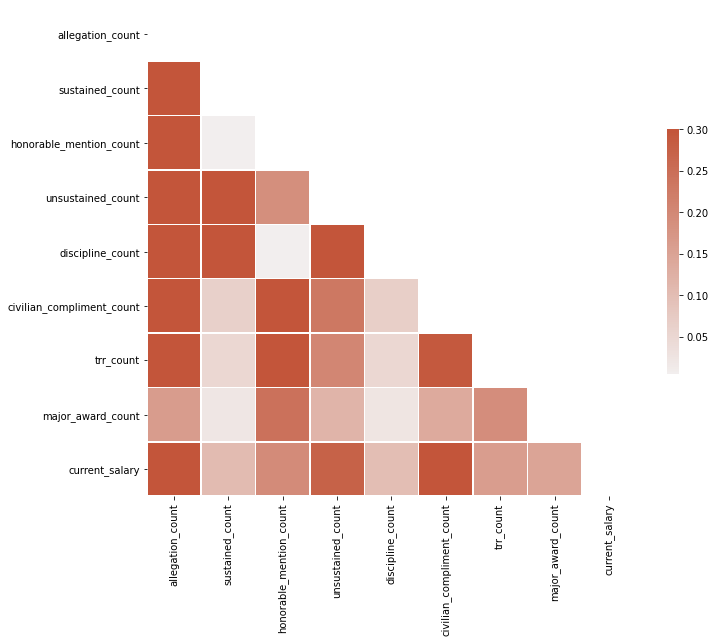

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv("./Data/data_officer_1.csv", skiprows= 0) 

def correlation_heatmap(train):
    # correlations_1 = train.corr()

    corr = train.corr()

    mask = np.triu(np.ones_like(corr, dtype=bool))

    f, ax = plt.subplots(figsize=(11, 9))

    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    # fig, ax = plt.subplots(figsize=(20,20))
    # sns.heatmap(correlations_1, vmax=1.0, center=0, fmt='.2f',
    #             square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})

    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
    
    plt.show()

correlation_heatmap(train)

### One Hot Encoding

In [4]:
other =  pd.get_dummies(train, columns=["race", "gender"], prefix=["race", "gender"])

### Taking the mean of the salary to fill the null values in salary

In [5]:
other.isnull().sum()

allegation_count                           0
sustained_count                            0
honorable_mention_count                    0
unsustained_count                          0
discipline_count                           0
civilian_compliment_count                  0
trr_count                                  0
major_award_count                          0
current_salary                         14029
race_Asian/Pacific                         0
race_Black                                 0
race_Hispanic                              0
race_Native American/Alaskan Native        0
race_Unknown                               0
race_White                                 0
gender_F                                   0
gender_M                                   0
dtype: int64

In [6]:
salary_mean = other.current_salary.mean()

other.current_salary.fillna(salary_mean, inplace = True)

other.isnull().sum()

allegation_count                       0
sustained_count                        0
honorable_mention_count                0
unsustained_count                      0
discipline_count                       0
civilian_compliment_count              0
trr_count                              0
major_award_count                      0
current_salary                         0
race_Asian/Pacific                     0
race_Black                             0
race_Hispanic                          0
race_Native American/Alaskan Native    0
race_Unknown                           0
race_White                             0
gender_F                               0
gender_M                               0
dtype: int64

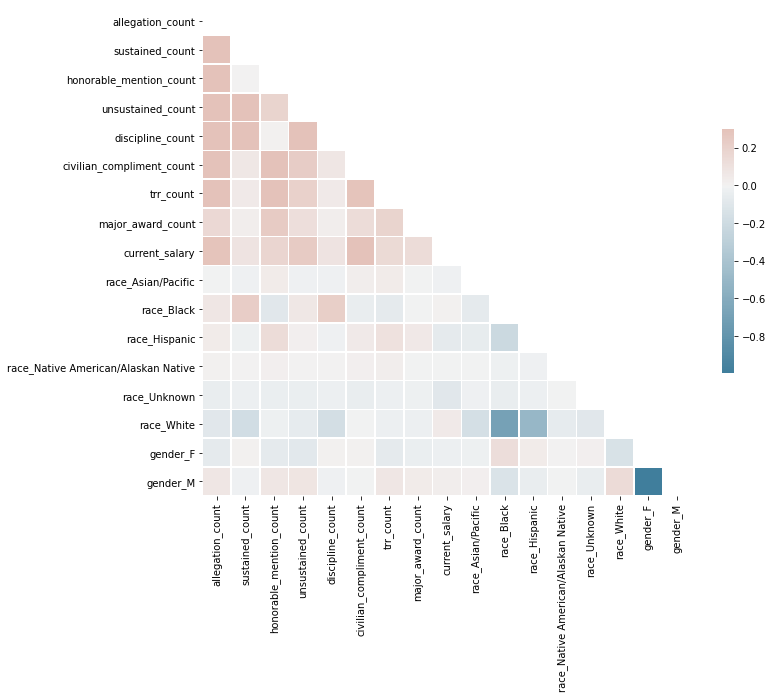

In [7]:
correlation_heatmap(other)

In [8]:
correalted_df = other[['allegation_count', 'sustained_count', 'honorable_mention_count',
       'unsustained_count', 'discipline_count', 'civilian_compliment_count',
       'trr_count', 'major_award_count', 'current_salary']]

correalted_df.loc[correalted_df.allegation_count <= 1, 'allegation_class'] = 0
correalted_df.loc[correalted_df.allegation_count > 1, 'allegation_class'] = 1
correalted_df.loc[correalted_df.allegation_count > 7, 'allegation_class'] = 2

C:\Users\madha\anaconda3\envs\CP4\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\madha\anaconda3\envs\CP4\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\madha\anaconda3\envs\CP4\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [9]:
correalted_df.allegation_class.value_counts()

0.0    13534
2.0    11003
1.0     9302
Name: allegation_class, dtype: int64

In [10]:
X = correalted_df[['sustained_count', 'honorable_mention_count',
       'unsustained_count', 'discipline_count', 'civilian_compliment_count',
       'trr_count', 'major_award_count', 'current_salary']]
y = correalted_df[['allegation_class']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Model: Decision Tree Classifier

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=4)
cross_val_score(clf, correalted_df, correalted_df['allegation_count'], cv=10)

clf.fit(X_train,y_train)

C:\Users\madha\anaconda3\envs\CP4\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


DecisionTreeClassifier(max_depth=4)

### Exporting Decision Tree for Visualization

In [12]:
from sklearn.tree import export_graphviz  
export_graphviz(clf, out_file ='./Results/dtree_1.dot', 
                feature_names = X_train.columns)  

### Accuracy  (Decision Tree)

In [13]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
print("Accuracy = ", accuracy_score(y_test, y_pred) )

Accuracy =  0.8481239365989075


### Confusion Matrix (Decision Tree)

In [14]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(20,20))
cm = confusion_matrix(y_test, y_pred)
plt.show()
print(cm)


<Figure size 1440x1440 with 0 Axes>

[[3993  440    0]
 [ 336 2397  335]
 [   4  581 3081]]


### Classification Report (Decision Tree)

In [15]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.90      0.91      4433
         1.0       0.70      0.78      0.74      3068
         2.0       0.90      0.84      0.87      3666

    accuracy                           0.85     11167
   macro avg       0.84      0.84      0.84     11167
weighted avg       0.85      0.85      0.85     11167



## Model : Random Forest Classifier

In [16]:
from sklearn.ensemble import RandomForestClassifier
clf_RF = RandomForestClassifier(max_depth=6, random_state=0)
clf_RF.fit(X_train,y_train)

y_pred_RF = clf_RF.predict(X_test)

C:\Users\madha\anaconda3\envs\CP4\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


### Accuracy  (Random Forest Classifier)

In [17]:
accuracy_score(y_test, y_pred_RF) 

0.8748097071729202

### Classification Report (Random Forest Classifier)

In [18]:
print(classification_report(y_test, y_pred_RF))


              precision    recall  f1-score   support

         0.0       0.92      0.93      0.92      4433
         1.0       0.77      0.78      0.77      3068
         2.0       0.91      0.89      0.90      3666

    accuracy                           0.87     11167
   macro avg       0.87      0.87      0.87     11167
weighted avg       0.88      0.87      0.88     11167



## Model : GridSearch CV

In [19]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': np.linspace(1, 10, num=10).astype(int), 'max_leaf_nodes': np.linspace(2, 31, num=30).astype(int)}
model = DecisionTreeClassifier()
clf_GSCV = GridSearchCV(model, parameters, return_train_score = True, 
                        scoring='accuracy', 
                        cv=5)
                       
                       
clf_GSCV.fit(X, y)
y_pred_GSCV = clf_GSCV.predict(X_test)

### Accuracy (GridSearch CV)

In [20]:
print('best accuracy: ',accuracy_score(y_test, y_pred_GSCV) )
clf_GSCV.best_estimator_

best accuracy:  0.8642428584221367


DecisionTreeClassifier(max_depth=6, max_leaf_nodes=31)

### Classification Report (GridSearch CV)

In [21]:
print(classification_report(y_test, y_pred_GSCV))

              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92      4433
         1.0       0.75      0.77      0.76      3068
         2.0       0.93      0.84      0.88      3666

    accuracy                           0.86     11167
   macro avg       0.86      0.85      0.85     11167
weighted avg       0.87      0.86      0.86     11167



## Model: Gradient Boosting Classifier

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
clf_2 = GradientBoostingClassifier(random_state = 0)
clf_2.fit(X_train, y_train)
y_pred = clf_2.predict(X_test)

C:\Users\madha\anaconda3\envs\CP4\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


### Cross Validation Score 

In [23]:
cross_val_score(clf_2, y_test, y_pred)


array([0.87421665, 0.86660698, 0.87953426, 0.87460815, 0.88222123])

### Mean Accuracy

In [24]:
clf_2.score(X_test, y_test)


0.8754365541327125